## Coinbase API Integration

In [1]:
# Data Extraction

import pandas as pd
import json
import requests
import hmac
import hashlib
import time
import cbpro
import pickle
    
from requests.auth import AuthBase

# --------------------------------------------------------------

# Data Cleaning/Vis

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import jedi


import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert(0, 'src/')
from api_pull import historic_data, save_all_historic_coin_data, load_history, get_keys, plot_coin_over_time

### Public

In [2]:
public_client = cbpro.PublicClient()

In [3]:
coins = pd.DataFrame(public_client.get_products())

In [4]:
coins.head()

,id,base_currency,quote_currency,base_min_size,base_max_size,quote_increment,base_increment,display_name,min_market_funds,max_market_funds,margin_enabled,fx_stablecoin,max_slippage_percentage,post_only,limit_only,cancel_only,trading_disabled,status,status_message,auction_mode
0,ETH-USDC,ETH,USDC,0.00029,2800,0.01,0.00000001,ETH/USDC,1,1000000,False,False,0.10000000,False,False,False,False,online,,False
1,ATOM-BTC,ATOM,BTC,0.1,25000,0.000001,0.1,ATOM/BTC,0.000021,30,False,False,0.10000000,False,False,False,False,online,,False
2,RAD-EUR,RAD,EUR,0.1,32000,0.01,0.01,RAD/EUR,0.84,100000,False,False,0.10000000,False,False,False,False,online,,False
3,LRC-BTC,LRC,BTC,2,440000,0.00000001,1,LRC/BTC,0.000021,6.0,False,False,0.10000000,False,False,False,False,online,,False
4,TRU-USDT,TRU,USDT,1.9,490000,0.0001,0.1,TRU/USDT,1,100000,False,False,0.10000000,False,False,False,False,online,,False


In [5]:
coins.sort_values('id', inplace=True)

In [6]:
public_client.get_product_order_book('BTC-USD')

{'bids': [['61174.01', '0.02757542', 1]],
 'asks': [['61175.16', '0.08176111', 1]],
 'sequence': 30203441886,
 'auction_mode': False,
 'auction': None}

In [7]:
public_client.get_product_ticker('BTC-USD')

{'trade_id': 221954601,
 'price': '61173.39',
 'size': '0.24459317',
 'time': '2021-10-15T23:05:06.734143Z',
 'bid': '61173.68',
 'ask': '61174.67',
 'volume': '26384.06538686'}

In [8]:
public_client.get_product_24hr_stats('BTC-USD')

{'open': '57359.51',
 'high': '62910',
 'low': '56867.11',
 'volume': '26384.06538686',
 'last': '61143.13',
 'volume_30day': '426696.70355161'}

In [9]:
# save_all_historic_coin_data(coins)

In [10]:
history = load_history('BTC-USD')
history.head()

,time,low,high,open,close,volume
0,1634338800,61228.26,61303.58,61303.58,61259.66,9.556364
1,1634338740,61293.62,61350.48,61294.28,61302.87,11.440728
2,1634338680,61284.51,61356.43,61289.15,61294.28,5.461633
3,1634338620,61268.05,61353.29,61342.46,61282.49,9.616215
4,1634338560,61340.08,61380.72,61376.63,61345.21,3.636540


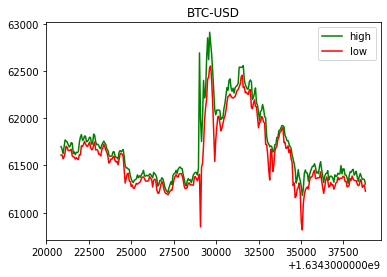

In [11]:
plot_coin_over_time('BTC-USD')

### Private

In [12]:
# Before implementation, set environmental variables with the names API_KEY and API_SECRET
API_KEY = get_keys('/Users/kyledufrane/.secret/cbpro_key.json')
API_SECRET = get_keys('/Users/kyledufrane/.secret/cbpro_secret.json')
API_PASSPHRASE = get_keys('/Users/kyledufrane/.secret/cbpro_passphrase.json')

In [13]:
auth_client = cbpro.AuthenticatedClient(API_KEY['key'], 
                                        API_SECRET['secret'],
                                        API_PASSPHRASE['passphrase'])

In [14]:
auth_client.get_accounts()

[{'id': '3afaa6c3-e28a-4f37-9148-644149bedad2',
  'currency': '1INCH',
  'balance': '0.0000000000000000',
  'hold': '0.0000000000000000',
  'available': '0',
  'profile_id': 'e53bcc9b-e226-40e1-90fd-074fdba0273b',
  'trading_enabled': True},
 {'id': 'de550a43-d040-4f6a-ae16-308a4b8f88b7',
  'currency': 'AAVE',
  'balance': '0.0000000000000000',
  'hold': '0.0000000000000000',
  'available': '0',
  'profile_id': 'e53bcc9b-e226-40e1-90fd-074fdba0273b',
  'trading_enabled': True},
 {'id': 'c9455562-a715-4025-9b58-8762adca2f59',
  'currency': 'ACH',
  'balance': '0.0000000000000000',
  'hold': '0.0000000000000000',
  'available': '0',
  'profile_id': 'e53bcc9b-e226-40e1-90fd-074fdba0273b',
  'trading_enabled': True},
 {'id': 'c76f423f-43d8-4b19-a31f-daf20a1de212',
  'currency': 'ADA',
  'balance': '0.0000000000000000',
  'hold': '0.0000000000000000',
  'available': '0',
  'profile_id': 'e53bcc9b-e226-40e1-90fd-074fdba0273b',
  'trading_enabled': True},
 {'id': 'c63769a9-6032-4dcf-8166-b6aa

### Modeling

In [15]:
btc = load_history('BTC-USD')
btc.head()

,time,low,high,open,close,volume
0,1634338800,61228.26,61303.58,61303.58,61259.66,9.556364
1,1634338740,61293.62,61350.48,61294.28,61302.87,11.440728
2,1634338680,61284.51,61356.43,61289.15,61294.28,5.461633
3,1634338620,61268.05,61353.29,61342.46,61282.49,9.616215
4,1634338560,61340.08,61380.72,61376.63,61345.21,3.636540


In [16]:
from sklearn.model_selection import train_test_split

X = btc.drop('high', axis=1)
y = btc['high']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)